<a href="https://colab.research.google.com/github/JoelmirDias/Trabalho/blob/main/Dessalgadora_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo de arraste da dessalgadora da U200A

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.9 MB 73.3 MB/s 
     |████████████████████████████████| 102 kB 35.4 MB/s 
     |████████████████████████████████| 690 kB 43.5 MB/s 
     |████████████████████████████████| 4.7 MB 49.3 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 65.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=72ff59c7ed0102003971d38768b6da22def542ea7b6f27faf373a71c88873040
  Stored in directory: /tmp/pip-ephem-wheel-cache-7t95gc6v/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a0e75289ccf7aed31e13637665f62553dc33741da06ed605352b961887364acf
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3

In [2]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
from pandas_profiling import ProfileReport
plt.style.use("ggplot")
warnings.simplefilter("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = (12,8)


### Importação dos dados

In [4]:
url='https://github.com/JoelmirDias/Trabalho/blob/main/Dados_Exporta.xlsx?raw=true'

In [5]:
dados=pd.read_excel(url)

,SALMOURA,TI20604,TI20605,Carga,Densidade,POLI,DESEM,pH,LIC20506A,LIC20506B,LIC20506C,LIC20506D,PDI20632,PDI20633,PDI20502,PDI20504
0,CLARA,151.866501,152.471100,29735.132812,0.856654,NÃO INJETA,NÃO INJETA,9.6,29.925329,29.992090,52.158199,51.940632,0.929341,0.916705,0.493935,0.549344
1,CLARA,152.779800,152.950500,29694.128906,0.856654,NÃO INJETA,NÃO INJETA,9.6,29.975401,29.701210,51.304649,50.598530,0.906500,0.879749,0.497129,0.565604
2,CLARA,152.540298,150.821503,29837.505859,0.855049,NÃO INJETA,NÃO INJETA,9.6,30.054079,30.082689,52.723259,52.556641,0.909552,0.913176,0.489929,0.560359
3,CLARA,154.892303,150.010803,29886.443359,0.855049,NÃO INJETA,NÃO INJETA,9.5,29.977779,29.937250,51.588371,52.546890,0.923619,0.918612,0.501087,0.554351
4,CLARA,155.630295,152.763199,29956.599609,0.855049,NÃO INJETA,NÃO INJETA,9.5,30.015930,29.963480,51.137749,51.997459,0.941692,0.907406,0.499418,0.540045


In [6]:
dados.tail()

,SALMOURA,TI20604,TI20605,Carga,Densidade,POLI,DESEM,pH,LIC20506A,LIC20506B,LIC20506C,LIC20506D,PDI20632,PDI20633,PDI20502,PDI20504
8804,CLARA,142.685699,145.477005,33038.753906,0.870441,NÃO INJETA,NÃO INJETA,7.0,38.329708,37.981461,52.909370,54.633991,1.130379,1.099765,1.205482,1.142729
8805,CLARA,136.542603,140.084503,32996.617188,0.870441,NÃO INJETA,NÃO INJETA,7.0,38.017380,38.033390,53.139950,55.334190,1.137245,1.129377,1.217880,1.188458
8806,CLARA,136.537094,140.028595,32954.429688,0.870441,NÃO INJETA,NÃO INJETA,5.2,38.096050,38.116711,53.187061,55.575260,1.181735,1.123417,1.227226,1.190700
8807,CLARA,138.628403,140.281693,32959.792969,0.870441,NÃO INJETA,NÃO INJETA,5.2,38.224800,37.931492,53.447880,54.274139,1.161183,1.151026,1.226320,1.179828
8808,CLARA,144.738998,145.729599,32966.441406,0.870441,NÃO INJETA,NÃO INJETA,5.2,35.144390,32.754398,42.329910,43.762760,1.195325,1.121223,1.150549,1.152695


### Relatório dos dados

In [ ]:
profile=dados.profile_report()
profile.to_file(output_file="dessalgadora.html")
profile

### Hot-Encoding: Criação de variáveis dummies

In [7]:
cat_vars=['POLI','DESEM']
for var in cat_vars:
  cat_list = pd.get_dummies(dados[var], prefix=var)
  dados = dados.join(cat_list)

In [8]:
dados['SALMOURA'].value_counts()

CLARA     8260
TURVA      278
ESCURA     271
Name: SALMOURA, dtype: int64

In [9]:
Arraste=[]
for i in range(len(dados['SALMOURA'])):
  if dados['SALMOURA'][i]=='CLARA':
    Arraste.append(0)
  elif dados['SALMOURA'][i]=='TURVA':
    Arraste.append(1)
  else:
    Arraste.append(2)
dados['Arraste']=Arraste

In [10]:
dados.drop(columns=['SALMOURA','POLI','DESEM','DESEM_NÃO INJETA','POLI_NÃO INJETA' ], inplace=True)

### Visualização do Desbalanceamento

In [11]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

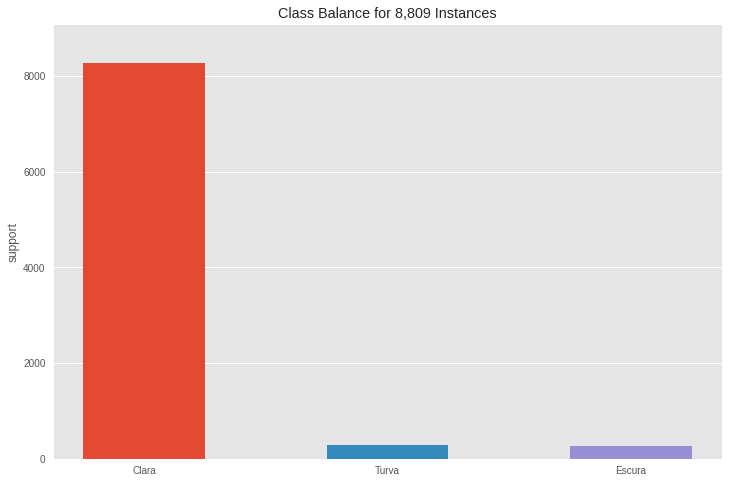

In [12]:
visualizer=ClassBalance(labels=['Clara','Turva','Escura']).fit(dados.Arraste)
visualizer.show()

Conclusão: Modelo bastante desbalanceado. Utilizaremos técnica de sobre/sub-amostragem

In [14]:
dados.Arraste.value_counts()

0    8260
1     278
2     271
Name: Arraste, dtype: int64

Considera-se que há dados suficiente da categoria 1 e 2 para fazer subamostragem.

### Técnica de Subamostragem

In [15]:
from imblearn.under_sampling import RandomUnderSampler

In [16]:
X = dados.loc[:, dados.columns != 'Arraste']
y = dados.Arraste

In [18]:
sub=RandomUnderSampler()
x_sub,y_sub=sub.fit_resample(X, y)
y_sub.value_counts()

0    271
1    271
2    271
Name: Arraste, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sub, y_sub, test_size=0.3, stratify=y_sub)

### Criação dos Modelos

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport

In [21]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay
plt.rcParams['figure.figsize']=[16,9]

### Ajuste RandomForest

In [24]:
from sklearn.model_selection import KFold
crossvalidation=KFold(n_splits=5, shuffle=True, random_state=1)
scorer='accuracy'
max_features=[x_sub.shape[1]/3, 'sqrt','log2','auto']
min_samples_leaf=[1,10,30]
n_estimators=[50,100,300]
RF=RandomForestClassifier()

In [26]:
search_grid= {'n_estimators':n_estimators,'max_features': max_features,'min_samples_leaf':min_samples_leaf}
rf_cv=GridSearchCV(estimator=RF,
                         param_grid=search_grid,
                         scoring=scorer,
                         cv=crossvalidation)
rf_cv.fit(X_train,y_train)
best_params=rf_cv.best_params_
best_score=rf_cv.best_score_
print('Melhores parâmetros: %s'% best_params)
print('Melhor acurácia: %s'% best_score)

Melhores parâmetros: {'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 50}
Melhor acurácia: 0.5043937276820369


In [27]:
y_rf_cv=rf_cv.predict(X_test)

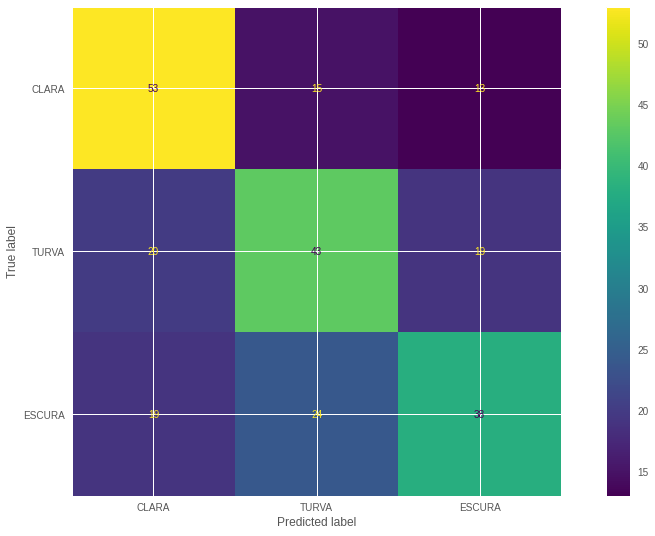

In [28]:
mc_rf_cv=cm(y_test, y_rf_cv)
mcd_Melhor=ConfusionMatrixDisplay(mc_rf_cv, display_labels=['CLARA','TURVA','ESCURA'])
mcd_Melhor.plot()

### Árvore de Decisão

In [29]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [30]:
tree_cv=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameters,cv=10)
tree_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [32]:
y_tree_cv=tree_cv.predict(X_test)

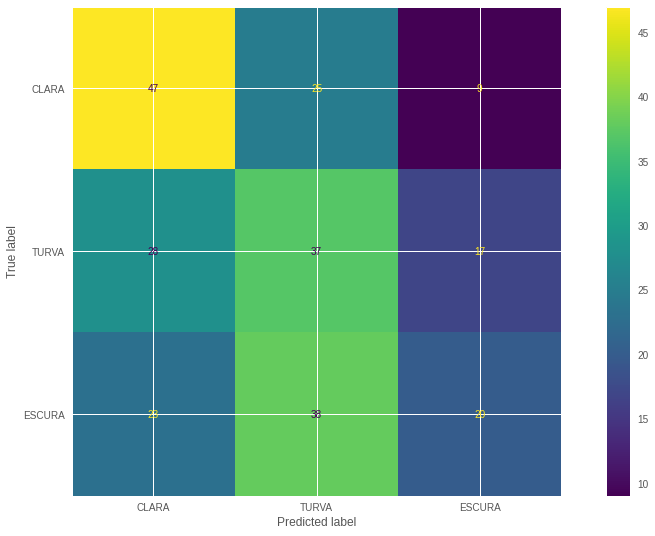

In [34]:
mc_Tree=cm(y_test, y_tree_cv)
mcd_Tree=ConfusionMatrixDisplay(mc_Tree, display_labels=['CLARA','TURVA','ESCURA'])
mcd_Tree.plot()

In [35]:
print("Hiperparâmetros: ",tree_cv.best_params_)
print("Acurácia :",tree_cv.best_score_)

Hiperparâmetros:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Acurácia : 0.4813909774436091


### Logística

In [36]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [37]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv=GridSearchCV(estimator=LogisticRegression(),param_grid=parameters,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [39]:
print("Hiperparâmetros: ",logreg_cv.best_params_)
print("Acurácia :",logreg_cv.best_score_)

Hiperparâmetros:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Acurácia : 0.39539473684210524


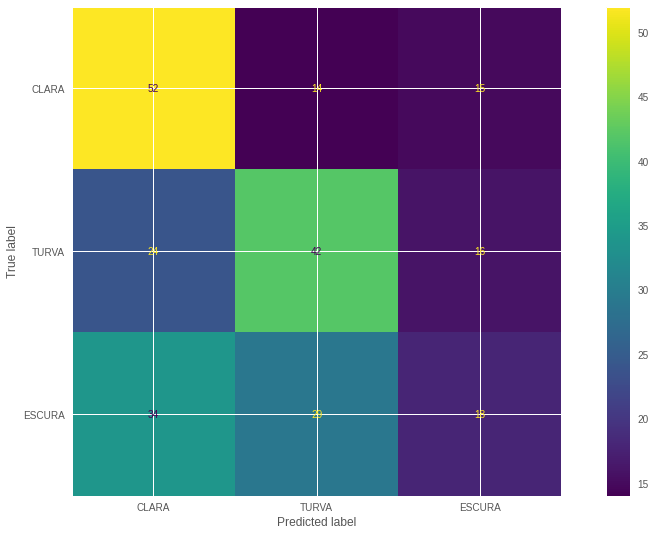

In [40]:
y_predlog=logreg_cv.predict(X_test)
mc_log=cm(y_test, y_predlog)
mcdlog=ConfusionMatrixDisplay(mc_log, display_labels=['CLARA','TURVA','ESCURA'])
mcdlog.plot()

## O melhor ajuste foi o Random Forest

### Preparando exportação do modelo

### Ajuste com todos os dados

In [43]:
rf_final=GridSearchCV(estimator=RF,
                         param_grid=search_grid,
                         scoring=scorer,
                         cv=crossvalidation)
rf_final.fit(x_sub,y_sub)
best_params=rf_final.best_params_
best_score=rf_final.best_score_
print('Melhores parâmetros: %s'% best_params)
print('Melhor acurácia: %s'% best_score)

Melhores parâmetros: {'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 300}
Melhor acurácia: 0.54970839960615


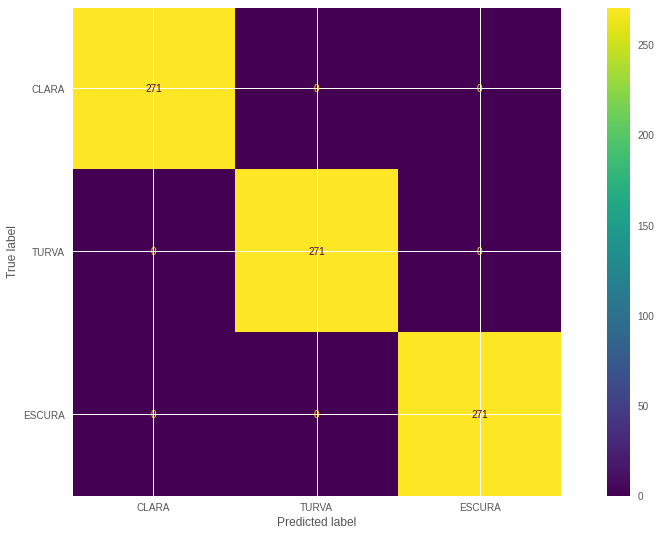

In [46]:
y_rf_final=rf_final.predict(x_sub)
mc_final=cm(y_sub, y_rf_final)
mcd_final=ConfusionMatrixDisplay(mc_final, display_labels=['CLARA','TURVA','ESCURA'])
mcd_final.plot()

### Exportação do Modelo

In [47]:
# salvar modelo
import pickle
# salvar o modelo RandomForest (RF) no arquivo dessalgadora.pkl
with open('dessalgadora.pkl', 'wb') as file:
    pickle.dump(rf_final, file)